# **House Sales in King County, USA**

https://www.kaggle.com/harlfoxem/housesalesprediction

## Analysis of data
1. correlation between features
2. correlation between features and target variable
3. scatter plots: feature vs. feature, feature vs. target
4. bar charts for features

## Feature selection and augmentation
1. Filling missing values
2. Normalization/standardization

## Algorithm selection
1. Custom linear regressor
2. Sklearn/other regressors
3. Hyperparameter selection

## Results evaluation
1. Train / test set
2. RMSE, MSE, MAE
3. Feature importance

In [1]:
# Import the libraries
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for plotting 
import pandas as pd # for manipulating datasets
import seaborn as sns
from pylab import rcParams
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from collections import Counter
# Read the house data into a data frame
df = pd.read_csv('kc_house_data.csv')

Погляньмо спочатку на наш dataset

In [2]:
# Display the first five observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Основна задача:** оцінити які параметри необхідні для аналізу даного dataset та передбачення результату
Очевидно, що скоріш за все, target variable(цільова змінна), яку ми хочемо передбачити це - price

In [3]:
# Display the number of starting features
len(df.columns)

21

In [4]:
# Display the number of data observations
len(df)

21613

In [5]:
# Check the types of data
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Перевіряємо чи в dataset є NaN значення

In [6]:
# Display the number of null data observations
df.isnull().values.sum()

0

Оскільки dataset виявився чистим, немає необхідності заповнювати пропущені значення

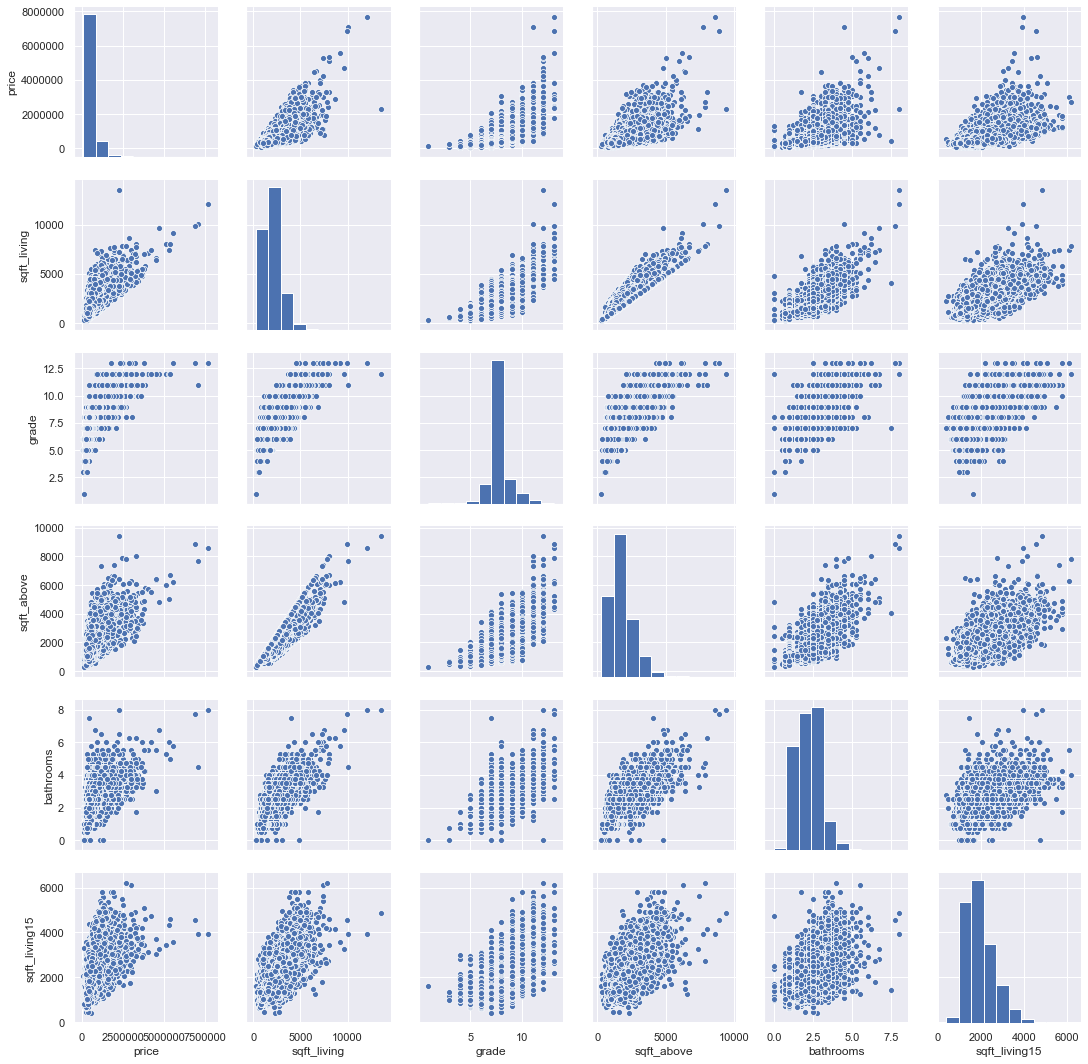

In [7]:
# Lets select the main variable (important features) and review the insigts by using pairplots 
sns.set()
cols = df[['price','sqft_living','grade','sqft_above','bathrooms','sqft_living15']]
sns.pairplot(cols, height = 2.5)

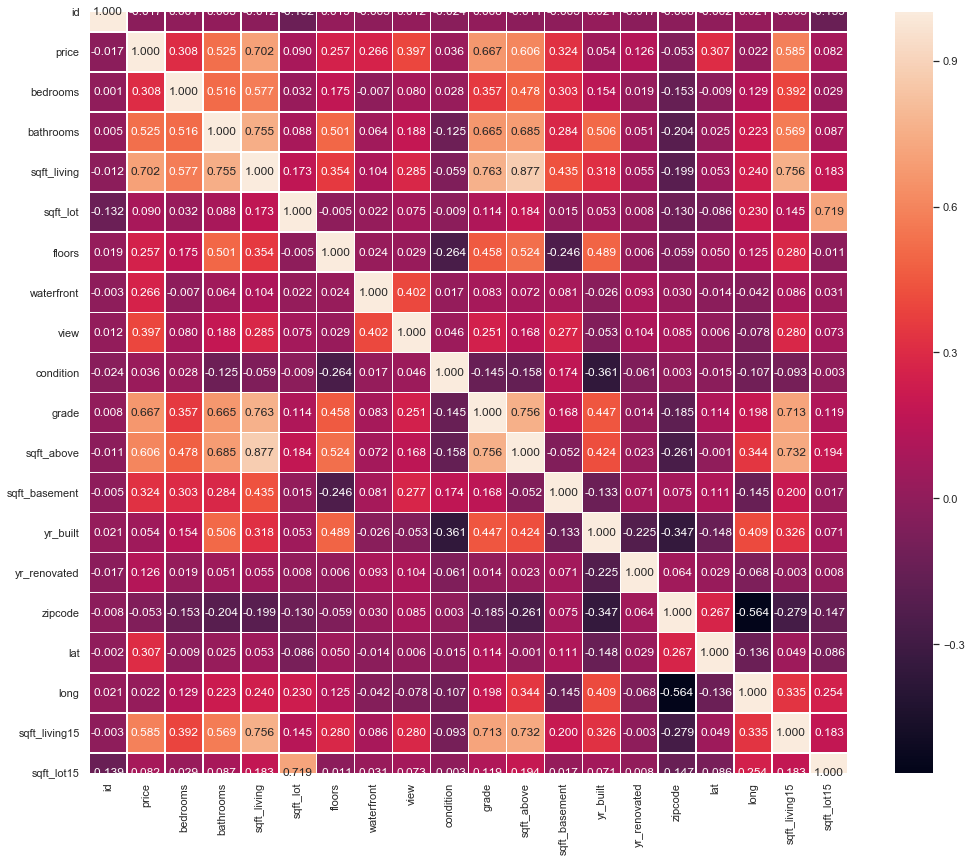

In [8]:
#df correlation matrix shows relations between all variables in the dataset  
f,ax = plt.subplots(figsize=(17, 14))
sns.heatmap(df.corr(), annot=True,annot_kws={'size': 12}, linewidths=.5, fmt='.3f', ax=ax)

Ми можемо бачити, що кожен запис має _id_, а також _data_. Ці два стовпці не мають значення для нашого аналізу, тому ми видалимо їх.

In [9]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

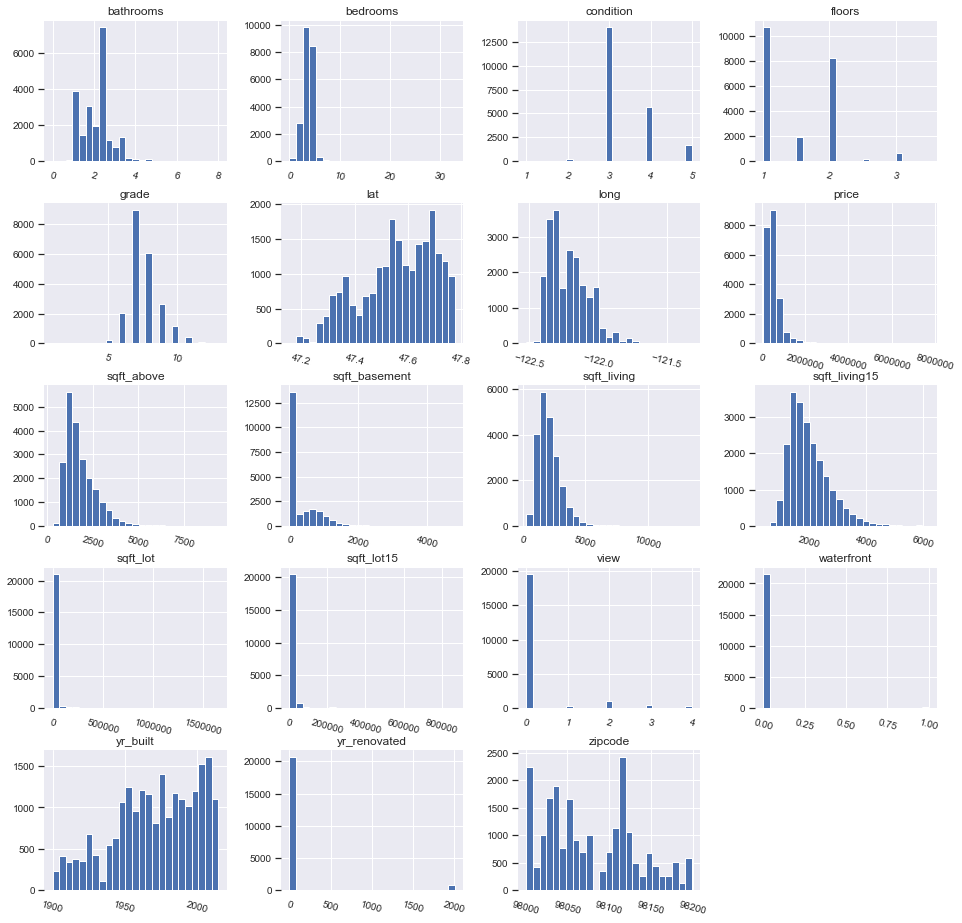

In [10]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Вказуємо , що є нашою target variable, яку ми хочеммо передбачити і які features ми будемо використовувати

In [11]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [12]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Використовуючи метод фільтра, ми виберемо, які features будемо використовувати. Видалимо всі features з absolute correlation з target variable, меншою за 0.2.

In [13]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [14]:
# Remove features with correlation < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

scatter plots feature vs. target

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


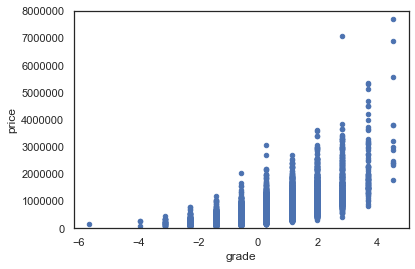

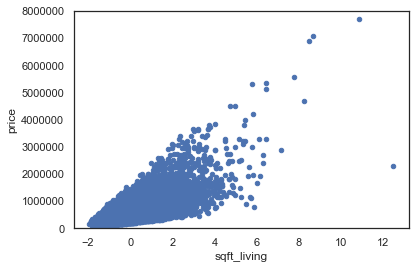

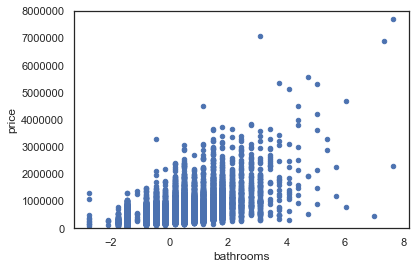

In [34]:
var3 = 'grade'
data = pd.concat([df['price'], df[var3]], axis=1)
data.plot.scatter(x=var3, y='price', ylim=(0,8000000));

var = 'sqft_living'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,8000000));

var4 = 'bathrooms'
data = pd.concat([df['price'], df[var4]], axis=1)
data.plot.scatter(x=var4, y='price', ylim=(0,8000000) );

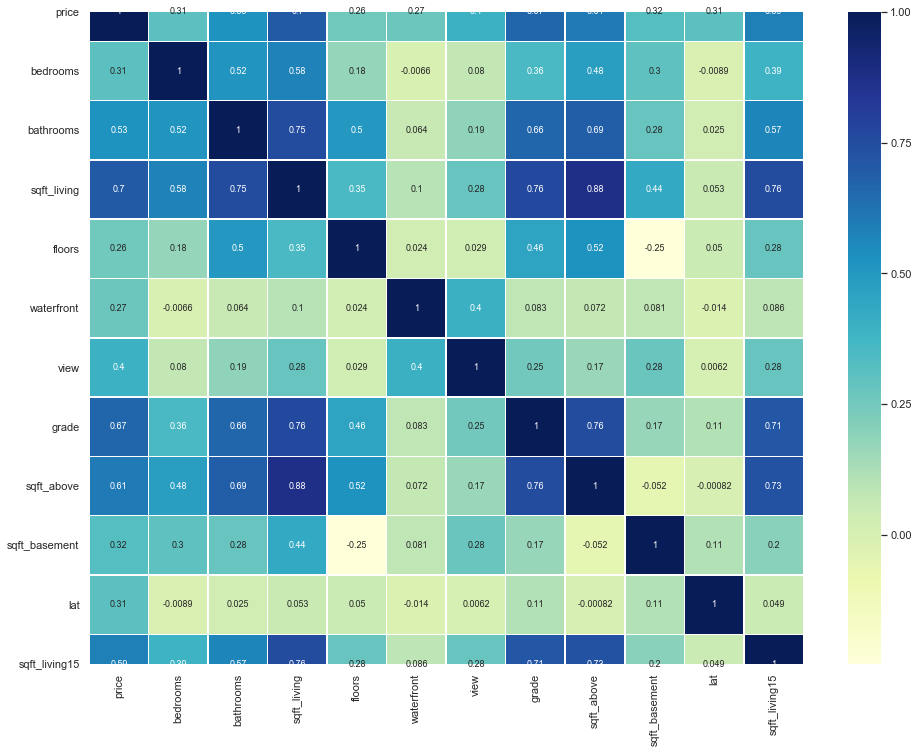

In [16]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(16, 12))
new_correlations = df.corr()

sns.heatmap(new_correlations,linewidths=.5, annot=True,cmap="YlGnBu", annot_kws={'size': 9})
plt.show()

Поглянувши на графік, можна помітити що багато ознак мають дуже високий коефіціент кореляції. Тому доцільним, є знайти кореляції вищим, наприклад, за 0.75 , а всі інші видалити

In [17]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1,-,-,-,0.762704,0.876597,-,-,0.75642
floors,-,-,-,-,1,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1,-,-,-,-,-,-
view,-,-,-,-,-,-,1,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1,0.755923,-,-,-
sqft_above,-,-,-,0.876597,-,-,-,0.755923,1,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1,-,-


Отже, що ми бачимо ці пари
    ("bathrooms", "sqft_living")
    ("grade", "sqft_living")
    ("grade", sqft_above")
мають дуже високі коефііціенти кореляції. Тому доцільним є видалити features _sqft_above_ і _sqft_living15_ .
Найвищий коефіціент кореляції з  target variable (0.702) має _sqft_living_

In [18]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

Отже отримуємо 9 features які будуть використані для  лінійної регресії.

In [19]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

9

Перед тим як реалізовувати алгоритм лінійної регресії нормалізуємо наші дані

In [20]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

Hyperparameter selection

In [21]:
# Create X, y and theta
X = df.iloc[:, 1:]
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

Зберігаємо target variable  і перевііряємо розмір матриць

In [22]:
# Store target
target = y

# Display the size of the matrices
X.shape, y.shape, theta.shape

((21613, 10), (21613, 1), (1, 10))

Визначаємо cost function J(Θ).

In [23]:
# Define computer the cost function
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

Встановлюємо к-сть ітерацій(параметри моделі) та швидкість навчання alfa

In [24]:
# Set iterations and alpha (learning rate)
alpha = 0.01
iterations = 500

Також визначимо функцію, яка робить gradient descent, мінімізуючи cost function.

In [25]:
# Define gradientdescent function
# Hyperparameter selection
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

"learning" - частина

In [26]:
# Do Gradient Descent and display final theta
final_theta, cost = gradientdescent(X, y, theta, iterations, alpha)
final_theta.round(2)

array([[536539.5 , -15531.37,  13447.21, 136689.98, -11342.24,  52134.98,
         53770.94, 111975.36,  12410.22,  91337.08]])

In [27]:
# Compute and display final cost
final_cost = computecost(X, y, final_theta)
final_cost.round(2)

23301779924.46

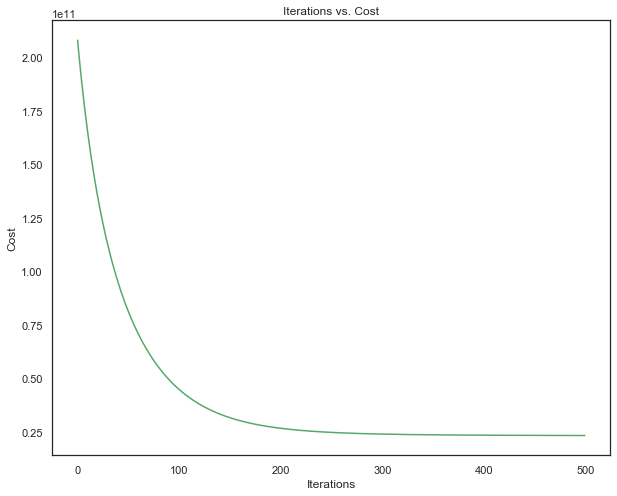

In [37]:
# Plot Iterations vs. Cost figure
fig_2, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Iterations vs. Cost')
plt.show()

Лінійна регресія Sklearn

In [29]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))


Average Price for Test Data: 539744.130
Intercept: 539809.2651913384
Coefficient: [259227.01813946]


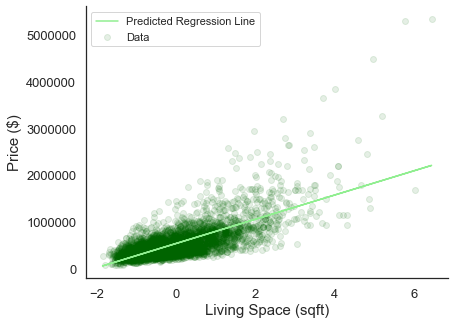

In [36]:
sns.set(style="white", font_scale=1)

plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="lightgreen",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Root Mean Squared Error (RMSE) 

In [31]:
# Define rmse function
def rmse(target, final_theta):
    predictions = X @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

# Compute and display Root Mean Squared Error
rmse_val = rmse(target, final_theta)
rmse_val.round(2)

215878.58

Ми можемо бачити, що значення RMSE є високим (~ 216 000 USD). Однак якщо враховувати, що ціни в початковому наборі даних були від 75 000 до 7 700 000 доларів США і мали стандартне відхилення приблизно 367 000 доларів США, це значення RMSE зовсім не є несподіваним.

Приклад прогнозування для перевірки, чи працює наш алгоритм за призначенням. У наших даних ми використовуємо нормалізовані особливості першого наближення з ціною 221 900 доларів США.

In [32]:
# Display sample prediction for first observation
predictions = X @ final_theta.T
str(predictions[0].round(2))



'[275784.67]'